# 泰迪熊 Tidy Data with Pandas

先來個標準設定。

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/Users/mac/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


使用 `seaborn` 讓圖漂亮一點。

In [2]:
import seaborn as sns

畫圖要使用中文的設定, 我用了很普級的 `SimHei`, 還是沒有請自行換一個。

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 選個普通的黑體字
plt.rcParams['axes.unicode_minus']=False # 負號不出問題

這裡使用 Tidy Data 創始人的書 "R for Data Analysis" 中介紹 Tidy Data 的部份。可以在網路上看到書中的內容:

[Tidy Data](http://r4ds.had.co.nz/tidy-data.html)

例子就是書上的例子, 只是翻成了中文。

## 1. 四個我們使用的 DataFrame

這裡有四張表格, 其實內容完全一樣, 只是整理呈現的方式不同。

#### table1

只有這個是 tidy data!!

In [4]:
col1 = ['國家', '年份', '案例', '人口']
data1 = [['阿富汗', 1999, 745, 19987071],
['阿富汗', 2000, 2666, 20595360],
['巴西', 1999, 37737, 172006362],
['巴西', 2000, 80488, 174504898],
['中國', 1999, 212258, 1272915272],
['中國', 2000, 213766, 1280428583]]

In [5]:
table1 = pd.DataFrame(data=data1, columns=col1)

In [6]:
table1

,國家,年份,案例,人口
0,阿富汗,1999,745,19987071
1,阿富汗,2000,2666,20595360
2,巴西,1999,37737,172006362
3,巴西,2000,80488,174504898
4,中國,1999,212258,1272915272
5,中國,2000,213766,1280428583


#### table2

In [7]:
col2 = ['國家', '年份', '類別', '數量']
data2 = [['阿富汗', 1999, '案例', 745],
       ['阿富汗', 1999, '人口', 19987071],
       ['阿富汗', 2000, '案例', 2666],
       ['阿富汗', 2000, '人口', 20595360],
       ['巴西', 1999, '案例', 37737],
       ['巴西', 1999, '人口', 172006362],
       ['巴西', 2000, '案例', 80488],
       ['巴西', 2000, '人口', 174504898],
       ['中國', 1999, '案例', 212258],
       ['中國', 1999, '人口', 1272915272],
       ['中國', 2000, '案例', 213766],
       ['中國', 2000, '人口', 1280428583]]

In [8]:
table2 = pd.DataFrame(data=data2, columns=col2)

In [9]:
table2

,國家,年份,類別,數量
0,阿富汗,1999,案例,745
1,阿富汗,1999,人口,19987071
2,阿富汗,2000,案例,2666
3,阿富汗,2000,人口,20595360
4,巴西,1999,案例,37737
5,巴西,1999,人口,172006362
6,巴西,2000,案例,80488
7,巴西,2000,人口,174504898
8,中國,1999,案例,212258
9,中國,1999,人口,1272915272


#### table3

In [10]:
col3 = ["國家", "年份", "比例"]
data3 = [['阿富汗', 1999, '745/19987071'],
       ['阿富汗', 2000, '2666/20595360'],
       ['巴西', 1999, '37737/172006362'],
       ['巴西', 2000, '80488/174504898'],
       ['中國', 1999, '212258/1272915272'],
       ['中國', 2000, '213766/1280428583']]

In [11]:
table3 = pd.DataFrame(data=data3, columns=col3)

In [12]:
table3

,國家,年份,比例
0,阿富汗,1999,745/19987071
1,阿富汗,2000,2666/20595360
2,巴西,1999,37737/172006362
3,巴西,2000,80488/174504898
4,中國,1999,212258/1272915272
5,中國,2000,213766/1280428583


#### table4

分成兩個表格, `table4a` 是案例, `table4b` 是人口。

In [13]:
col4a = ['國家', 1999, 2000]
data4a = [['阿富汗', 745, 2666],
       ['巴西', 37737, 80488],
       ['中國', 212258, 213766]]

In [14]:
table4a = pd.DataFrame(data=data4a, columns=col4a)

In [15]:
col4b = ['國家', 1999, 2000]
data4b = [['阿富汗', 19987071, 20595360],
       ['巴西', 172006362, 174504898],
       ['中國', 1272915272, 1280428583]]

In [16]:
table4b = pd.DataFrame(data=data4b, columns=col4b)

In [17]:
table4a

,國家,1999,2000
0,阿富汗,745,2666
1,巴西,37737,80488
2,中國,212258,213766


In [18]:
table4b

,國家,1999,2000
0,阿富汗,19987071,20595360
1,巴西,172006362,174504898
2,中國,1272915272,1280428583


## 2. 畫個圖

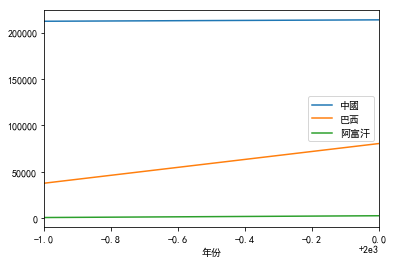

In [19]:
# 為了畫在同一張圖
fig, ax = plt.subplots()

for country, group in table1.groupby('國家'):
    group.plot(x='年份', y='案例', 
               ax=ax, label=country)

## 3. Tidy Data 是什麼?

1. 每個變數 (variable) 形成一行 (column)。
2. 每個觀察 (observation) 形成一列 (row)。
3. 每類觀察單位 (observational unit) 形成一個表格。

## 4. 手法一: melt

我們來看看 table4a。

In [21]:
table4a

,國家,1999,2000
0,阿富汗,745,2666
1,巴西,37737,80488
2,中國,212258,213766


這個有個問題是 1999, 2000 是「值」(values) 而不是變數名稱, 我們想增加一行叫「年份」的變數。

In [24]:
table4a_tidy = pd.melt(table4a, id_vars='國家', var_name='年份', value_name='案例')

In [25]:
table4a_tidy

,國家,年份,案例
0,阿富汗,1999,745
1,巴西,1999,37737
2,中國,1999,212258
3,阿富汗,2000,2666
4,巴西,2000,80488
5,中國,2000,213766


## 工作中

In [51]:
table4a  # cases
#> # A tibble: 3 × 3
#>       country `1999` `2000`
#> *       <chr>  <int>  <int>
#> 1 Afghanistan    745   2666
#> 2      Brazil  37737  80488
#> 3       China 212258 213766
table4b  # population
#> # A tibble: 3 × 3
#>       country     `1999`     `2000`
#> *       <chr>      <int>      <int>
#> 1 Afghanistan   19987071   20595360
#> 2      Brazil  172006362  174504898
#> 3       China 1272915272 1280428583

In [85]:
tb4a = table1[['國家', '年份', '案例']].copy()
tb4b = table1[['國家', '年份', '人口']].copy()

In [87]:
table4a = tb4a.pivot_table(index="國家", columns="年份", values="案例")
table4a.reset_index(drop=False, inplace=True)

In [92]:
table4b = tb4b.pivot_table(index="國家", columns="年份", values="人口")
table4b.reset_index(drop=False, inplace=True)

In [106]:
table4b.sort_values(by='國家', ascending=False).values

array([['阿富汗', 19987071, 20595360],
       ['巴西', 172006362, 174504898],
       ['中國', 1272915272, 1280428583]], dtype=object)

In [101]:
table4b.columns

Index(['國家', 1999, 2000], dtype='object', name='年份')

In [94]:
table4b.values

array([['中國', 1272915272, 1280428583],
       ['巴西', 172006362, 174504898],
       ['阿富汗', 19987071, 20595360]], dtype=object)